In [13]:
# Mount Google Drive to access the dataset
from google.colab import drive
drive.mount('/content/drive')

# Define the dataset path (change 'YourDatasetFolder' to your actual folder name)
import os
dataset_path = '/content/drive/MyDrive/Dataset'
os.listdir(dataset_path)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


['MM', 'CML', 'CLL', 'ALL', 'AML', 'Healthy']

In [14]:
# Import necessary libraries for preprocessing
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np

# Set image size and batch size according to model input requirements
IMG_SIZE = (224, 224)  # Adjust based on your model's needs
BATCH_SIZE = 32

# Data augmentation for the training set
train_datagen = ImageDataGenerator(
    rescale=1./255,            # Normalize pixel values to range [0, 1]
    rotation_range=20,         # Randomly rotate images by up to 20 degrees
    zoom_range=0.2,            # Randomly zoom into images
    horizontal_flip=True,      # Randomly flip images horizontally
    fill_mode='nearest',       # Fill in missing pixels after transformations
    validation_split=0.2       # Reserve 20% of data for validation set
)

# For validation data, we only rescale without augmentation
validation_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)


Found 1928 images belonging to 6 classes.


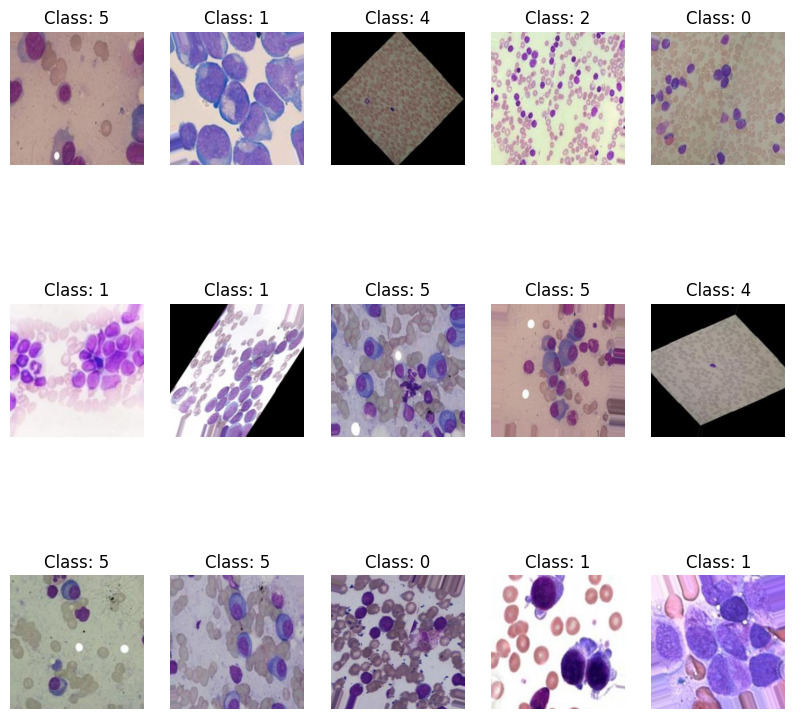

In [15]:
# Create a train generator
train_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=IMG_SIZE,            # Resize images to 224x224
    batch_size=BATCH_SIZE,
    class_mode='categorical',        # Multi-class classification
    subset='training'                # Specify that this is the training data
)

# Visualize a few preprocessed images from the training set
example_batch = next(train_generator)  # Grabs one batch of data
images, labels = example_batch  # Unpack the images and labels

# Display 5 images with their corresponding class labels
plt.figure(figsize=(10,10))

for i in range(15):  # Display the first 15 images
    plt.subplot(3, 5, i+1)
    plt.imshow(images[i])
    plt.title(f'Class: {np.argmax(labels[i])}')  # Displays the class label
    plt.axis('off')

plt.show()


In [16]:
# Load training data
train_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=IMG_SIZE,            # Resize images to 224x224 (adjustable)
    batch_size=BATCH_SIZE,
    class_mode='categorical',        # Multi-class classification
    subset='training'                # Specify that this is the training data
)

# Load validation data
validation_generator = validation_datagen.flow_from_directory(
    dataset_path,
    target_size=IMG_SIZE,            # Resize images to 224x224
    batch_size=BATCH_SIZE,
    class_mode='categorical',        # Multi-class classification
    subset='validation'              # Specify that this is the validation data
)

# If needed, load the test data similarly
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    dataset_path,                    # If using the same folder for test data for now
    target_size=IMG_SIZE,            # Resize to 224x224
    batch_size=BATCH_SIZE,
    class_mode='categorical',        # Multi-class classification
    shuffle=False                    # No shuffling for test data
)


Found 1928 images belonging to 6 classes.
Found 482 images belonging to 6 classes.
Found 2410 images belonging to 6 classes.


In [17]:
# Define the path to your dataset
dataset_path = '/content/drive/MyDrive/Dataset'

# Create the train generator
train_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=IMG_SIZE,            # Resize images to 224x224
    batch_size=BATCH_SIZE,
    class_mode='categorical',        # Multi-class classification
    subset='training'                # Specify that this is the training data
)

Found 1928 images belonging to 6 classes.


In [18]:
# Import necessary libraries for building the model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# Define the CNN model architecture
def create_cnn_model(input_shape=(224, 224, 3), num_classes=6):
    model = Sequential()

    # First Convolutional Layer
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Second Convolutional Layer
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Third Convolutional Layer
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Flatten the feature maps
    model.add(Flatten())

    # Fully Connected Layer
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))  # Dropout for regularization
    model.add(Dense(num_classes, activation='softmax'))  # Output layer with softmax activation

    return model

# Create the CNN model
cnn_model = create_cnn_model()

# Compile the model
cnn_model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

# Print model summary
cnn_model.summary()

# Define early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
cnn_history = cnn_model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // BATCH_SIZE,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // BATCH_SIZE,
    epochs=10,  # You can adjust the number of epochs
    callbacks=[early_stopping]
)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 86528)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      11,075,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 6)                   │             774 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,169,734 (42.61 MB)

 Trainable params: 11,169,734 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


60/60 ━━━━━━━━━━━━━━━━━━━━ 282s 5s/step - accuracy: 0.1933 - loss: 2.0245 - val_accuracy: 0.3542 - val_loss: 1.6988
Epoch 2/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.2812 - loss: 1.6844 - val_accuracy: 0.5000 - val_loss: 1.8392
Epoch 3/10


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


60/60 ━━━━━━━━━━━━━━━━━━━━ 272s 4s/step - accuracy: 0.3089 - loss: 1.6487 - val_accuracy: 0.3771 - val_loss: 1.3509
Epoch 4/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.5938 - loss: 1.2465 - val_accuracy: 1.0000 - val_loss: 0.7835
Epoch 5/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 328s 5s/step - accuracy: 0.3809 - loss: 1.3795 - val_accuracy: 0.3917 - val_loss: 1.3519
Epoch 6/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.4062 - loss: 1.4285 - val_accuracy: 0.5000 - val_loss: 1.1550
Epoch 7/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 291s 5s/step - accuracy: 0.4161 - loss: 1.3037 - val_accuracy: 0.5271 - val_loss: 1.0487
Epoch 8/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 23s 342ms/step - accuracy: 0.4062 - loss: 1.2144 - val_accuracy: 0.5000 - val_loss: 0.8665
Epoch 9/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 283s 5s/step - accuracy: 0.4906 - loss: 1.0920 - val_accuracy: 0.5542 - val_loss: 0.8808


In [19]:
# Import necessary libraries
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam

# Load the VGG16 model without the top layers (include_top=False)
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the convolutional base to prevent it from being trained
for layer in base_model.layers:
    layer.trainable = False

# Add custom layers on top of the base model
x = Flatten()(base_model.output)
x = Dense(256, activation='relu')(x)  # Add a dense layer with 256 units
x = Dense(6, activation='softmax')(x)  # Output layer for 6 classes

# Create the model
vgg_model = Model(inputs=base_model.input, outputs=x)

# Compile the model
vgg_model.compile(optimizer=Adam(learning_rate=0.0001),  # Use a small learning rate
                  loss='categorical_crossentropy',       # Loss function for multi-class classification
                  metrics=['accuracy'])                  # Metric to monitor during training

# Display the model summary
vgg_model.summary()

# Train the model using the train_generator and validation_generator
vgg_history = vgg_model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // BATCH_SIZE,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // BATCH_SIZE,
    epochs=10  # You can increase the number of epochs for better results
)


Model: "functional_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │       6,422,784 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 21,139,014 (80.64 MB)

 Trainable params: 6,424,326 (24.51 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

Epoch 1/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 1569s 26s/step - accuracy: 0.4471 - loss: 1.4067 - val_accuracy: 0.5104 - val_loss: 1.1265
Epoch 2/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 21s 18ms/step - accuracy: 0.5312 - loss: 1.0659 - val_accuracy: 0.0000e+00 - val_loss: 1.4855
Epoch 3/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 1620s 26s/step - accuracy: 0.6642 - loss: 0.8327 - val_accuracy: 0.5771 - val_loss: 0.9941
Epoch 4/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 21s 18ms/step - accuracy: 0.8125 - loss: 0.6002 - val_accuracy: 1.0000 - val_loss: 0.3284
Epoch 5/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 1561s 26s/step - accuracy: 0.7792 - loss: 0.5980 - val_accuracy: 0.6375 - val_loss: 0.8931
Epoch 6/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 23s 19ms/step - accuracy: 0.7500 - loss: 0.6641 - val_accuracy: 0.0000e+00 - val_loss: 1.4129
Epoch 7/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 1564s 26s/step - accuracy: 0.7912 - loss: 0.5496 - val_accuracy: 0.5896 - val_loss: 0.9616
Epoch 8/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 22s 31ms/step - accuracy: 0.7812 - loss: 0.5003 - val_

In [20]:
# Import necessary libraries
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D

# Load the MobileNetV2 model without the top layers (include_top=False)
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the convolutional base to prevent it from being trained
for layer in base_model.layers:
    layer.trainable = False

# Add custom layers on top of the base model
x = base_model.output
x = GlobalAveragePooling2D()(x)  # Global average pooling reduces the output of the last layer
x = Dense(128, activation='relu')(x)  # Add a dense layer with 128 units
x = Dense(6, activation='softmax')(x)  # Output layer for 6 classes

# Create the model
mobilenet_model = Model(inputs=base_model.input, outputs=x)

# Compile the model
mobilenet_model.compile(optimizer=Adam(learning_rate=0.0001),  # Use a small learning rate
                        loss='categorical_crossentropy',       # Loss function for multi-class classification
                        metrics=['accuracy'])                  # Metric to monitor during training

# Display the model summary
mobilenet_model.summary()

# Train the model using the train_generator and validation_generator
mobilenet_history = mobilenet_model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // BATCH_SIZE,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // BATCH_SIZE,
    epochs=10  # You can increase the number of epochs if needed
)


Model: "functional_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2             │ (None, 224, 224, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv1 (Conv2D)            │ (None, 112, 112, 32)   │            864 │ input_layer_2[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bn_Conv1                  │ (None, 112, 112, 32)   │            128 │ Conv1[0][0]            │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv1_relu (ReLU)         │ (None, 112, 112, 32)   │              0 │ bn_Conv1[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise   │ (None, 112, 112, 32)   │            288 │ Conv1_relu[0][0]       │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise_… │ (None, 112, 112, 32)   │            128 │ expanded_conv_depthwi… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise_… │ (None, 112, 112, 32)   │              0 │ expanded_conv_depthwi… │
│ (ReLU)                    │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_project     │ (None, 112, 112, 16)   │            512 │ expanded_conv_depthwi… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_project_BN  │ (None, 112, 112, 16)   │             64 │ expanded_conv_project… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand (Conv2D)   │ (None, 112, 112, 96)   │          1,536 │ expanded_conv_project… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand_BN         │ (None, 112, 112, 96)   │            384 │ block_1_expand[0][0]   │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand_relu       │ (None, 112, 112, 96)   │              0 │ block_1_expand_BN[0][… │
│ (ReLU)                    │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_pad               │ (None, 113, 113, 96)   │              0 │ block_1_expand_relu[0… │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_depthwise         │ (None, 56, 56, 96)     │            864 │ block_1_pad[0][0]      │
│ (DepthwiseConv2D)         │                        │                │                        │
├──────────────────────

 Total params: 2,422,726 (9.24 MB)

 Trainable params: 164,742 (643.52 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

Epoch 1/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 148s 2s/step - accuracy: 0.2878 - loss: 1.7887 - val_accuracy: 0.5167 - val_loss: 1.3661
Epoch 2/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5312 - loss: 1.2634 - val_accuracy: 0.0000e+00 - val_loss: 1.6600
Epoch 3/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 137s 2s/step - accuracy: 0.5941 - loss: 1.1458 - val_accuracy: 0.5771 - val_loss: 1.1583
Epoch 4/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7188 - loss: 0.8393 - val_accuracy: 0.5000 - val_loss: 1.1817
Epoch 5/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 143s 2s/step - accuracy: 0.6625 - loss: 0.9471 - val_accuracy: 0.6021 - val_loss: 1.0331
Epoch 6/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 18s 289ms/step - accuracy: 0.7812 - loss: 0.6014 - val_accuracy: 0.5000 - val_loss: 1.4205
Epoch 7/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 139s 2s/step - accuracy: 0.7080 - loss: 0.8145 - val_accuracy: 0.6104 - val_loss: 0.9900
Epoch 8/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 19s 279ms/step - accuracy: 0.6875 - loss: 0.8473 - val_accuracy: 1.00

In [21]:
# Import necessary libraries
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Add Dropout to your existing model (For CNN or MobileNetV2, or any model you're using)
# Example for adding Dropout to MobileNetV2:
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)  # Dropout layer added here with a 50% dropout rate
x = Dense(6, activation='softmax')(x)

# Create the updated MobileNetV2 model with Dropout
mobilenet_model_with_dropout = Model(inputs=base_model.input, outputs=x)

# Compile the model
mobilenet_model_with_dropout.compile(optimizer=Adam(learning_rate=0.0001),
                                     loss='categorical_crossentropy',
                                     metrics=['accuracy'])

# Early Stopping callback to monitor validation loss and stop training if it doesn't improve
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Data Augmentation (Applied to the training data to prevent overfitting)
train_datagen_augmented = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2  # Split into training and validation sets
)

# Re-create the train and validation generators with augmented data
train_generator_augmented = train_datagen_augmented.flow_from_directory(
    dataset_path,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'  # Training subset with augmentation
)

validation_generator_augmented = train_datagen_augmented.flow_from_directory(
    dataset_path,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'  # Validation subset
)

# Train the model with Dropout, Data Augmentation, and Early Stopping
mobilenet_history_with_dropout = mobilenet_model_with_dropout.fit(
    train_generator_augmented,
    steps_per_epoch=train_generator_augmented.samples // BATCH_SIZE,
    validation_data=validation_generator_augmented,
    validation_steps=validation_generator_augmented.samples // BATCH_SIZE,
    epochs=10,  # Higher epochs because of early stopping
    callbacks=[early_stopping]  # Early stopping to monitor validation loss
)


Found 1928 images belonging to 6 classes.
Found 482 images belonging to 6 classes.
Epoch 1/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 155s 2s/step - accuracy: 0.2342 - loss: 2.1540 - val_accuracy: 0.3979 - val_loss: 1.5020
Epoch 2/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.3438 - loss: 1.6666 - val_accuracy: 1.0000 - val_loss: 1.3142
Epoch 3/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 194s 2s/step - accuracy: 0.3993 - loss: 1.5057 - val_accuracy: 0.5333 - val_loss: 1.3116
Epoch 4/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 13s 186ms/step - accuracy: 0.5312 - loss: 1.2269 - val_accuracy: 0.5000 - val_loss: 0.7756
Epoch 5/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 190s 2s/step - accuracy: 0.4983 - loss: 1.3150 - val_accuracy: 0.5708 - val_loss: 1.2138
Epoch 6/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5625 - loss: 1.2359 - val_accuracy: 0.5000 - val_loss: 1.0503
Epoch 7/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 145s 2s/step - accuracy: 0.5458 - loss: 1.2252 - val_accuracy: 0.5708 - val_loss: 1.1698
Epoch 8/10
60/60 ━━━━━━━━━━━

In [22]:
!pip install keras-tuner -q

In [23]:
# Data Augmentation (Applied to the training data to prevent overfitting)
train_datagen_augmented = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2  # Split into training and validation sets
)

# Re-create the train and validation generators with augmented data
train_generator_augmented = train_datagen_augmented.flow_from_directory(
    dataset_path,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'  # Training subset with augmentation
)

validation_generator_augmented = train_datagen_augmented.flow_from_directory(
    dataset_path,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'  # Validation subset
)

Found 1928 images belonging to 6 classes.
Found 482 images belonging to 6 classes.


In [24]:
# Import necessary libraries for hyperparameter tuning
import keras_tuner as kt
# Define a function to build the model (for tuning)
def build_model(hp):
    model = Sequential()

    # Add convolutional layers with hyperparameter tuning
    model.add(Conv2D(
        filters=hp.Int('conv_1_filter', min_value=32, max_value=256, step=32),
        kernel_size=hp.Choice('conv_1_kernel', values=[3,5]),
        activation='relu',
        input_shape=(IMG_SIZE[0], IMG_SIZE[1], 3)
    ))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(
        filters=hp.Int('conv_2_filter', min_value=32, max_value=256, step=32),
        kernel_size=hp.Choice('conv_2_kernel', values=[3,5]),
        activation='relu'
    ))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Flatten())

    # Add dense layers with hyperparameter tuning
    model.add(Dense(
        units=hp.Int('dense_units', min_value=32, max_value=512, step=32),
        activation='relu'
    ))

    model.add(Dropout(hp.Float('dropout_rate', min_value=0.2, max_value=0.5, step=0.1)))

    # Output layer
    model.add(Dense(6, activation='softmax'))

    # Compile the model with a tunable learning rate
    model.compile(
        optimizer=Adam(hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='LOG')),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    return model

# Initialize Keras Tuner for hyperparameter search
tuner = kt.Hyperband(
    build_model,
    objective='val_accuracy',  # Tuning based on validation accuracy
    max_epochs=10,
    hyperband_iterations=2,
    directory='keras_tuner_dir',
    project_name='cnn_hyperparameter_tuning'
)

# Display a search space summary
tuner.search_space_summary()

# Execute the search (this will take time based on the number of models)
tuner.search(train_generator_augmented, epochs=10, validation_data=validation_generator_augmented)

# Get the best model from the tuning process
best_model = tuner.get_best_models(num_models=1)[0]

# Display a summary of the best model
best_model.summary()


Trial 6 Complete [01h 11m 54s]
val_accuracy: 0.3838174343109131

Best val_accuracy So Far: 0.5165975093841553
Total elapsed time: 06h 27m 51s

Search: Running Trial #7

Value             |Best Value So Far |Hyperparameter
160               |160               |conv_1_filter
5                 |3                 |conv_1_kernel
32                |160               |conv_2_filter
3                 |3                 |conv_2_kernel
352               |320               |dense_units
0.2               |0.2               |dropout_rate
0.00015266        |0.00038152        |learning_rate
2                 |2                 |tuner/epochs
0                 |0                 |tuner/initial_epoch
2                 |2                 |tuner/bracket
0                 |0                 |tuner/round

Epoch 1/2


KeyboardInterrupt: 

In [ ]:
# Evaluate the tuned MobileNetV2 model on the test set
test_loss, test_accuracy = mobilenet_model_with_dropout.evaluate(test_generator)
print(f"Test Accuracy: {test_accuracy*100:.2f}%")


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Predict on the test set
y_pred = mobilenet_model_with_dropout.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert predictions to class indices
y_true = test_generator.classes  # True class labels from the test set

# Generate classification report
print("Classification Report:")
print(classification_report(y_true, y_pred_classes, target_names=test_generator.class_indices.keys()))

# Generate confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)
print("Confusion Matrix:")
print(conf_matrix)


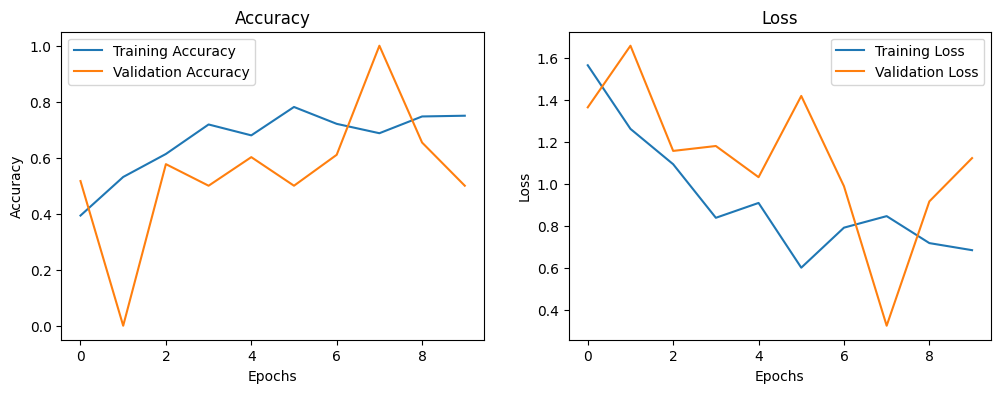

In [25]:
import matplotlib.pyplot as plt

# Plot the training and validation accuracy
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(mobilenet_history.history['accuracy'], label='Training Accuracy')
plt.plot(mobilenet_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot the training and validation loss
plt.subplot(1, 2, 2)
plt.plot(mobilenet_history.history['loss'], label='Training Loss')
plt.plot(mobilenet_history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


In [26]:
import seaborn as sns

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=test_generator.class_indices.keys(), yticklabels=test_generator.class_indices.keys())
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


NameError: name 'conf_matrix' is not defined

<Figure size 800x600 with 0 Axes>